In [ ]:
def reb_plot(data, exp, ax):
    sns.boxplot(
                data=data.expmt(exp).prb('NNXr'), 
                x='store', y='Bandpower', 
                order=['NNXr', 'NNXo'], 
                palette=['lightgray', 'dodgerblue'], 
                fliersize=0, 
                ax=ax, 
                width=0.4,
                medianprops={"color": "#3b3030", "linewidth": 3.2},
                whiskerprops={"color": "#3b3030", "linewidth": 3.2},
                capprops={"color": "#3b3030", "linewidth": 3.2},
                boxprops={"edgecolor": "#3b3030", "linewidth": 3.2},)

    sns.boxplot(
                data=data.expmt(exp).prb('NNXo'), 
                x='store', y='Bandpower', 
                order=['NNXr', 'NNXo'], 
                palette=['lightgray', 'dodgerblue'], 
                fliersize=0, 
                ax=ax, 
                width=0.4,
                medianprops={"color": "#2042d9", "linewidth": 3.2},
                whiskerprops={"color": "#2042d9", "linewidth": 3.2},
                capprops={"color": "#2042d9", "linewidth": 3.2},
                boxprops={"edgecolor": "#2042d9", "linewidth": 3.2},)

    plt.tight_layout()
    for patch in ax.patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, 0.6))

    #sns.swarmplot(data=som_swa.expmt('swisin'), x='store', y='Bandpower', order=['NNXr', 'NNXo'], palette=['#202223', 'blue'], marker='o', size=15, ax=ax, alpha=0.4)
    sns.lineplot(data=data.expmt(exp).sort_values('store', ascending=False), x='store', y='Bandpower', units='subject', estimator=None, color='#7800c2', ax=ax, linewidth=4.5, alpha=0.6)
    return ax

# SWA Differences - SWI + SWISIN Experiments

In [1]:
#-------------------------- Standard Imports --------------------------#
%reload_ext autoreload
%autoreload 2
import kdephys as kde
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import acr
plt.style.use('fast')
plt.style.use('/home/kdriessen/gh_master/kdephys/kdephys/plot/acr_plots.mplstyle')

# ---------------------------- EXTRAS --------------------------------#
from acr.utils import swi_subs_exps, sub_probe_locations, sub_exp_types
import pingouin as pg
band_def = list(kde.utils.spectral.bands.keys())

/home/kdriessen/miniconda3/envs/offdet/lib/python3.10/site-packages/neurodsp/__init__.py:5: FutureWarning: neurodsp has been renamed to ibldsp and the old name will be deprecated on 01-Sep-2024.
  warn(


In [4]:
def add_channel_zones(df):
    df['zone'] = 'no_zone'
    df.loc[np.logical_and(df['channel']>0, df['channel']<=4), 'zone'] = 'chans_1-4'
    df.loc[np.logical_and(df['channel']>4, df['channel']<=8), 'zone'] = 'chans_5-8'
    df.loc[np.logical_and(df['channel']>8, df['channel']<=12), 'zone'] = 'chans_9-12'
    df.loc[np.logical_and(df['channel']>12, df['channel']<=16), 'zone'] = 'chans_13-16'
    return df
    

In [2]:
# IMPORTANT PARAMETERS
# --------------------
REBOUND_LENGTH = '1h'
REL_STATE = 'NREM'

# SWA differences during Rebound

In [3]:
reb_df = acr.io.read_full_df(folder='rebound_data_1h')
reb_df = reb_df.sort_values('subject')

In [5]:
reb_df = add_channel_zones(reb_df)

## SWA

### ACR

In [ ]:
# Gets the mean DELTA values for the ACR animals, during NREM only, and then renames all experiments to 'swi' so that we can group by subject
delta_acr = reb_df.loc[reb_df['Band']=='delta'].loc[reb_df['state']=='NREM'].loc[reb_df['exp_type']=='acr']
delta_acr_means = delta_acr.groupby(['subject', 'exp', 'store'])['Bandpower'].mean().to_frame().reset_index().sort_values('Bandpower')
acr_swa = delta_acr_means.exp_names()

<Axes: xlabel='subject', ylabel='Bandpower'>

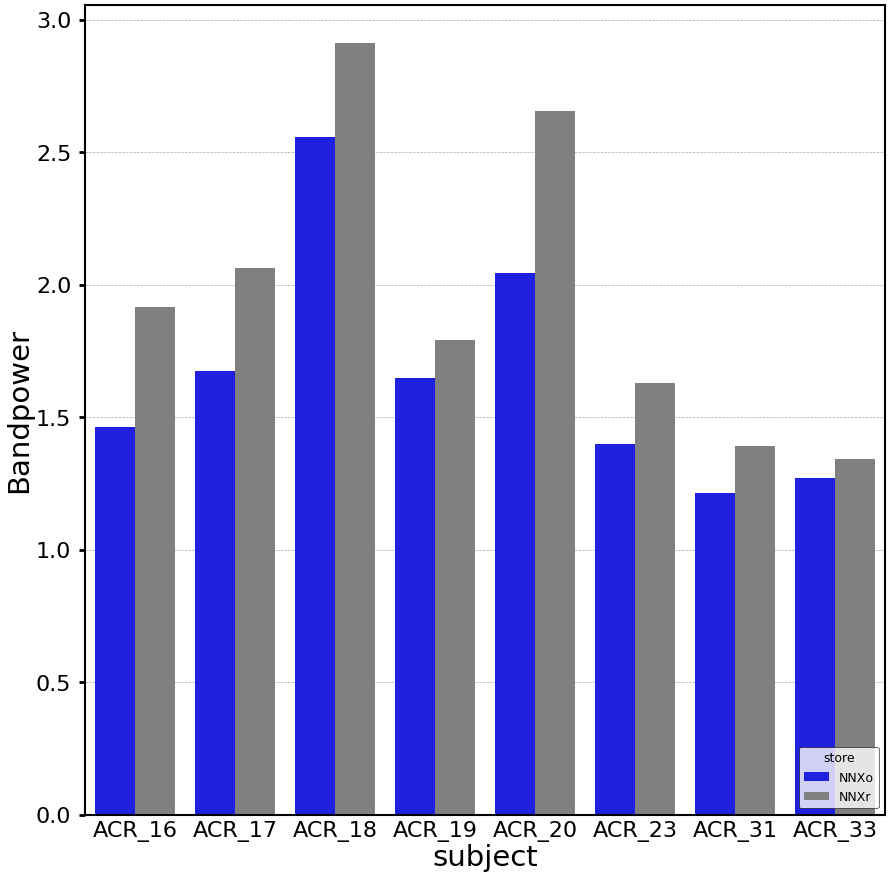

In [11]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(acr_swa.expmt('swi').sort_values('subject') , x='subject', y='Bandpower', hue='store', ax=ax, palette=['blue', 'gray'])

(0.0, 3.0)

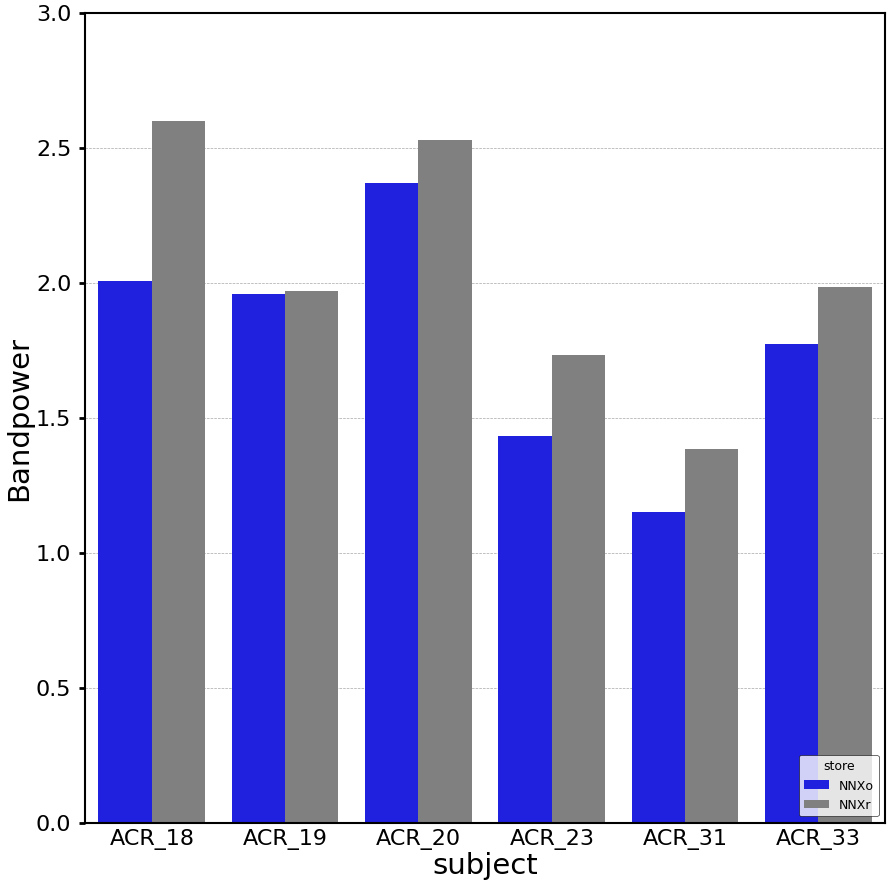

In [15]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(acr_swa.expmt('swisin').sort_values('subject') , x='subject', y='Bandpower', hue='store', ax=ax, palette=['blue', 'gray'])
ax.set_ylim(0, 3)

### SOM-ChR2

In [16]:
# Gets the mean DELTA values for the ACR animals, during NREM only, and then renames all experiments to 'swi' so that we can group by subject
delta_som = reb_df.loc[reb_df['Band']=='delta'].loc[reb_df['state']=='NREM'].loc[reb_df['exp_type']=='som']
delta_som_means = delta_som.groupby(['subject', 'exp', 'store'])['Bandpower'].mean().to_frame().reset_index().sort_values('Bandpower')
som_swa = delta_som_means.exp_names()

<Axes: xlabel='subject', ylabel='Bandpower'>

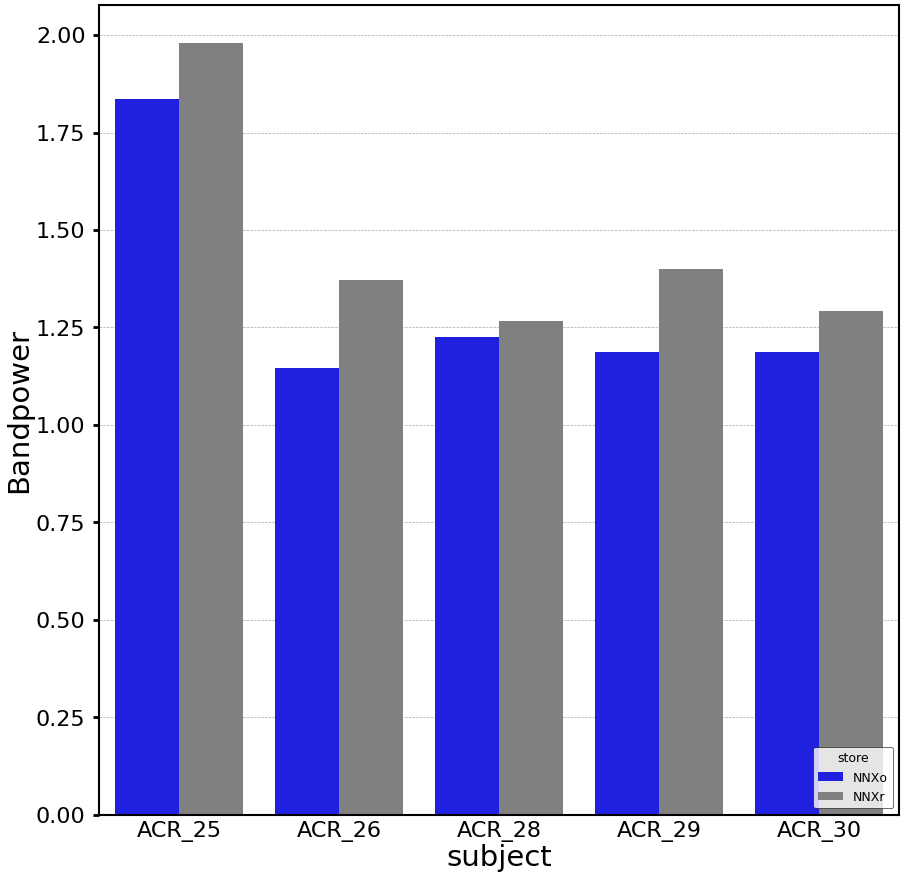

In [17]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(som_swa.expmt('swi').sort_values('subject') , x='subject', y='Bandpower', hue='store', ax=ax, palette=['blue', 'gray'])

(0.0, 2.0)

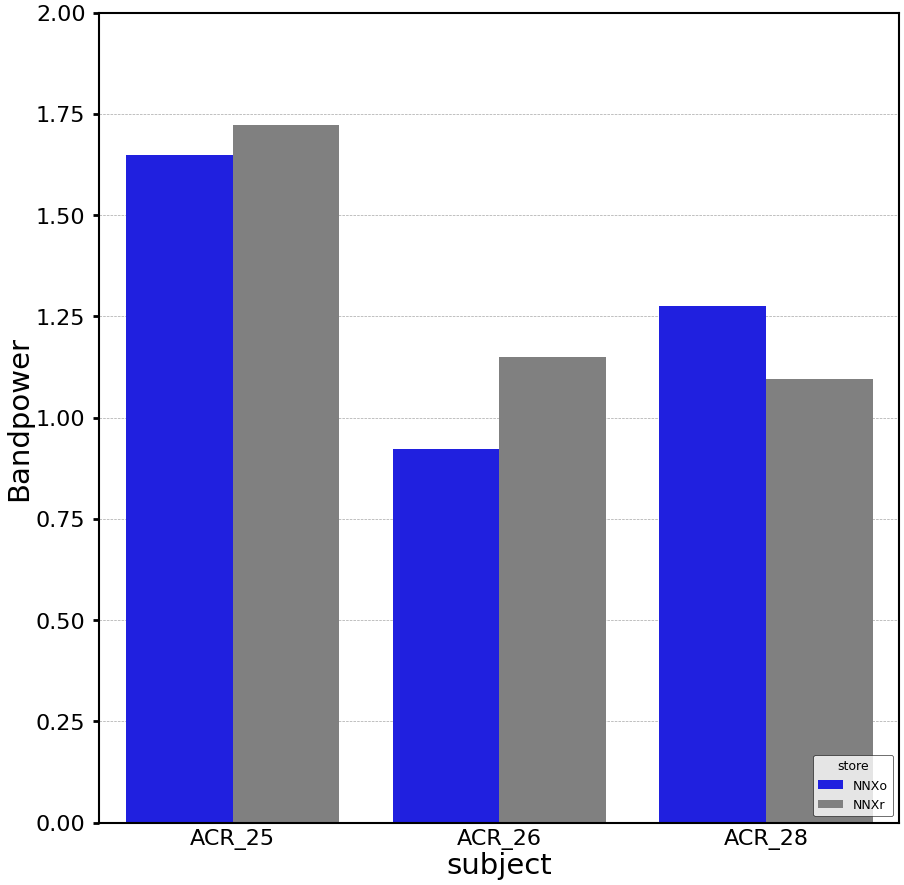

In [19]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.barplot(som_swa.expmt('swisin').sort_values('subject') , x='subject', y='Bandpower', hue='store', ax=ax, palette=['blue', 'gray'])
ax.set_ylim(0, 2)

# All Bands

(0.0, 3.5)

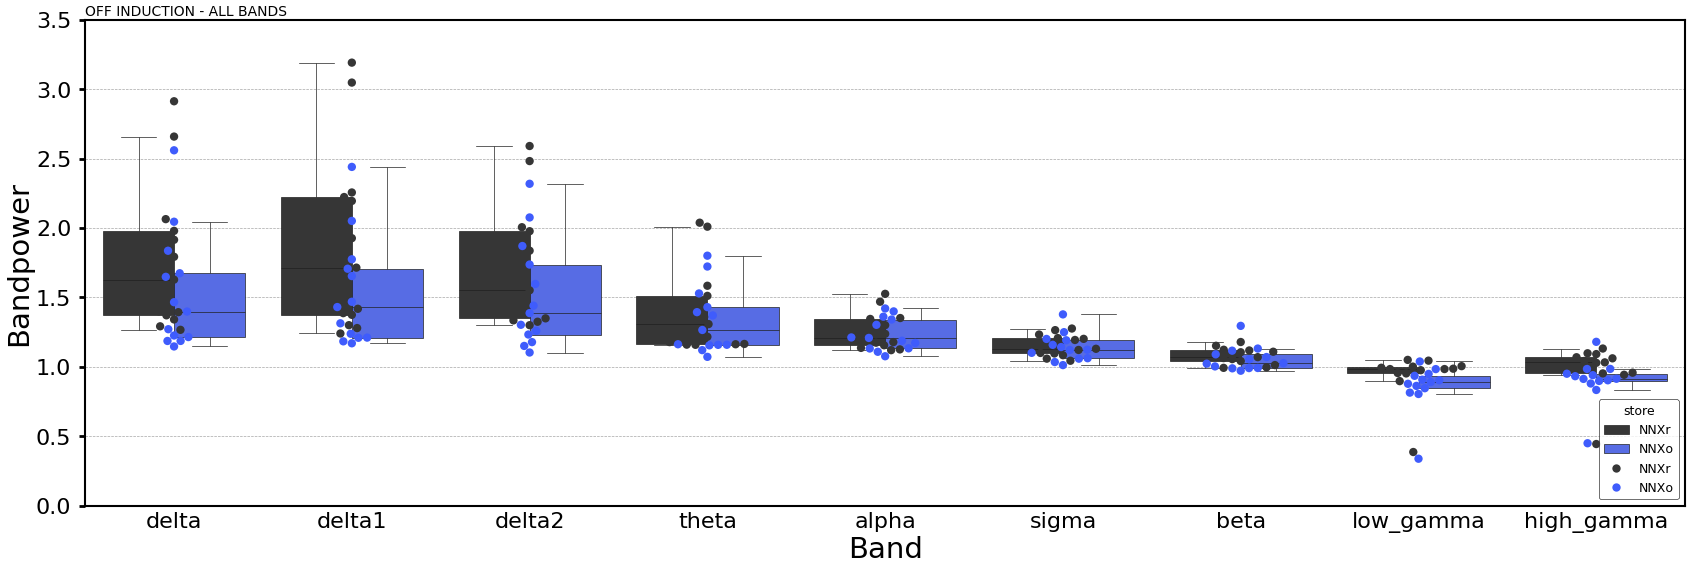

In [55]:
f, ax = plt.subplots()
sns.boxplot(data=bp_exp_means.exp_als('swi'), x='Band', y='Bandpower', hue='store', order=band_def, hue_order=['NNXr', 'NNXo'], fliersize=0, ax=ax)
sns.swarmplot(data=bp_exp_means.exp_als('swi'), x='Band', y='Bandpower', hue='store', order=band_def, hue_order=['NNXr', 'NNXo'], marker='o', size=12, ax=ax)
ax.set_title('OFF INDUCTION - ALL BANDS')
ax.set_ylim(0, 3.5)

(0.0, 3.5)

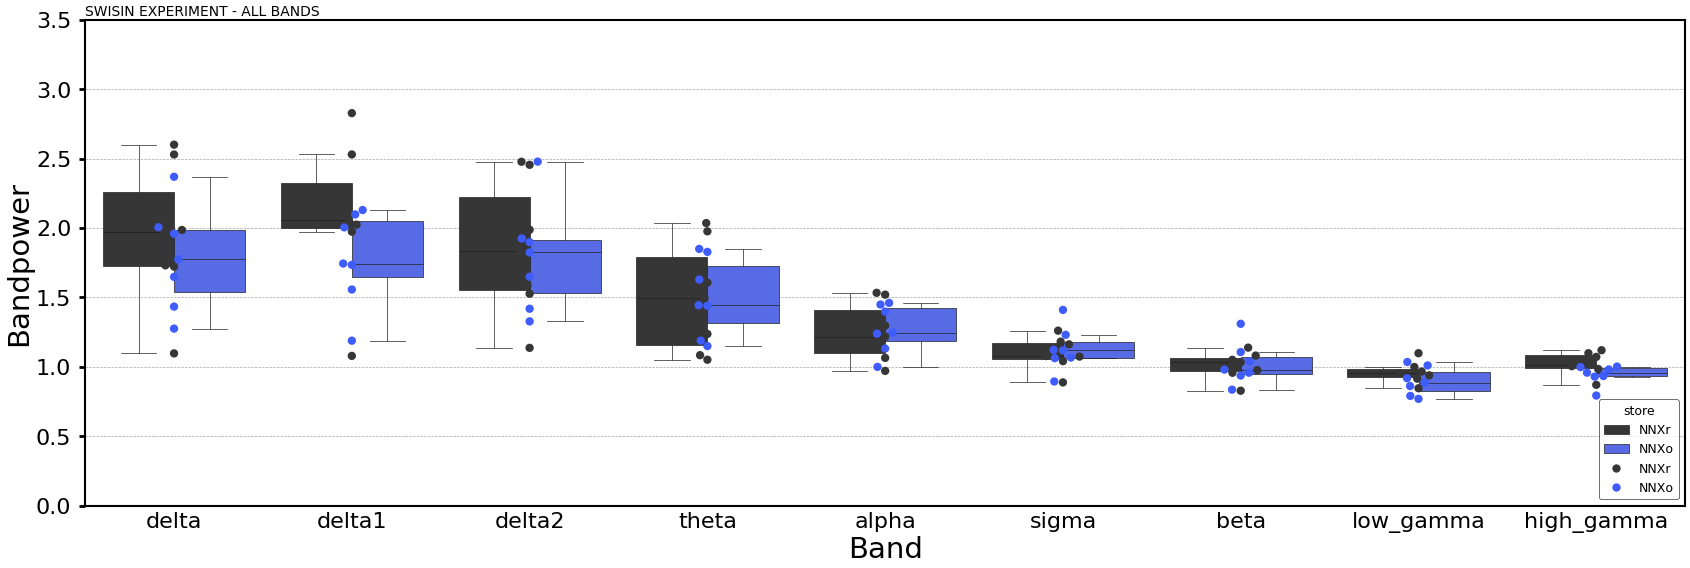

In [56]:
f, ax = plt.subplots()
sns.boxplot(data=bp_exp_means.exp_als('swisin'), x='Band', y='Bandpower', hue='store', order=band_def, hue_order=['NNXr', 'NNXo'], fliersize=0, ax=ax)
sns.swarmplot(data=bp_exp_means.exp_als('swisin'), x='Band', y='Bandpower', hue='store', order=band_def, hue_order=['NNXr', 'NNXo'], marker='o', size=12, ax=ax)
ax.set_title('SWISIN EXPERIMENT - ALL BANDS')
ax.set_ylim(0, 3.5)